In [1]:
# 生成测试数据

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
X,y=datasets.make_moons()

In [4]:
X.shape

(100, 2)

In [5]:
y.shape

(100,)

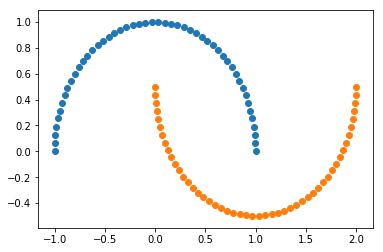

In [6]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

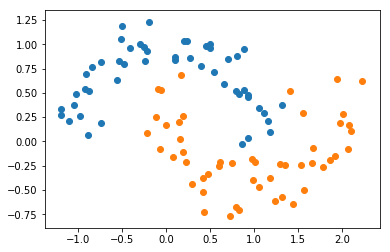

In [7]:
# 添加一点随机噪音
X,y=datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [8]:
# 多项式特征

In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [11]:
def PolySvc(degree, C=1.0):
    return Pipeline(
        [
            ("poly", PolynomialFeatures(degree=degree)),
            ("stdscalar", StandardScaler()),
            ("linearSVC", LinearSVC(C=C))
        ]
    )

In [12]:
polySvc = PolySvc(3)
polySvc.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('stdscalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [13]:
def plot_decision_boundry(model, axis):
    # meshgrid 可以参考项目03-第3章JupyterNotebook_numpy和map/numpy.ipynb
    # 其实就是分别生成按行看的矩阵和 按列看的矩阵
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    return

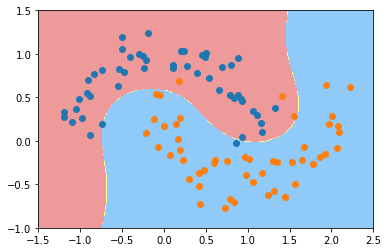

In [14]:
plot_decision_boundry(polySvc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [15]:
# 如何避免对数据的低维到高维的转换?
# 这就是核函数Kernal Trick

In [16]:
from sklearn.svm import SVC

In [18]:
def PolyKernalSVC(degree, C=1.0):
    return Pipeline(
        [
            ("stdscalar", StandardScaler()),
            ("kernalSVM", SVC(kernel="poly", degree=degree, C=C))
        ]
    )

In [19]:
polyKernal = PolyKernalSVC(3)

In [20]:
polyKernal.fit(X, y)

Pipeline(memory=None,
     steps=[('stdscalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernalSVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

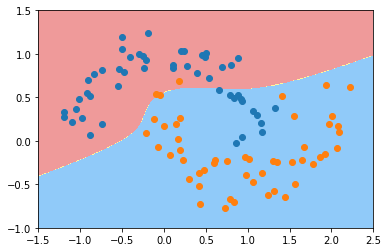

In [21]:
plot_decision_boundry(polyKernal, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

# 什么是核函数

# svm的最优化问题
![svm](img/svm11.png)
实际上转化为了如下的问题(对偶问题):
![svm](img/svm12.png)
![svm](img/svm13.png)

In [22]:
SVC?

## 高斯核函数

$$
K(x,y)=e^{-\gamma ||x-y||^2}
$$

$\gamma$是一个超参数, x,y分别是2个样本点
这个也被称为RBF=Radial Basis Function Kernal
这个将每个样本点映射到无穷维的特征空间.

一维的线性不可分点:
我们假设y分别是l1和l2:

![svm](img/svm14.png)

$$
x->  (e^{-\gamma ||x-l_1||^2}, e^{-\gamma ||x-l_2||^2})
$$


In [23]:
x = np.arange(-4, 5, 1)
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [24]:
y = np.array((x>=-2) & (x<=2), dtype="int")

In [25]:
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

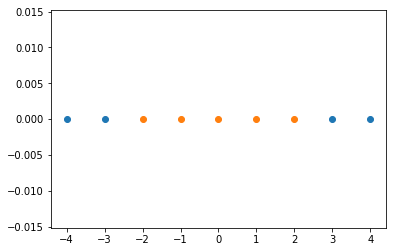

In [26]:
plt.scatter(x[y==0], [0] * len(x[y==0]))
plt.scatter(x[y==1], [0] * len(x[y==1]))
plt.show()

In [27]:
def guassian(x, l):
    # x是数据点, l是地表landmark
    gamma = 1.0
    return np.exp(-gamma*(x-l)**2)

In [28]:
l1, l2 = -1, 1
X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = guassian(data, l1)  # 特征1
    X_new[i, 1] = guassian(data, l2)  # 特征2

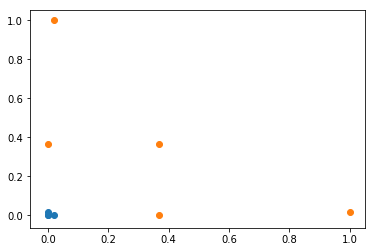

In [30]:
plt.scatter(X_new[y==0, 0], X_new[y==0, 1])
plt.scatter(X_new[y==1, 0], X_new[y==1, 1])
plt.show()

# 这里可以很容易的画一条直线来分割他们

# 实际上是将m*n的数据映射为m*m的数据 
# m是数据个数, n是特征数